# Predicting Hepatitis C

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Loading up the data

In [2]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [5]:
# Checking for missing values in the dataset
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [6]:
# Filling missing values with the median
df.fillna(df.mean(), inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [8]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [9]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 2, "3=Cirrhosis" : 3})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [10]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [12]:
df.describe()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.253659,47.408130,1.386992,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,0.742420,10.055105,0.487458,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,0.000000,19.000000,1.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,0.000000,39.000000,1.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,0.000000,47.000000,1.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,0.000000,54.000000,2.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,3.000000,77.000000,2.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


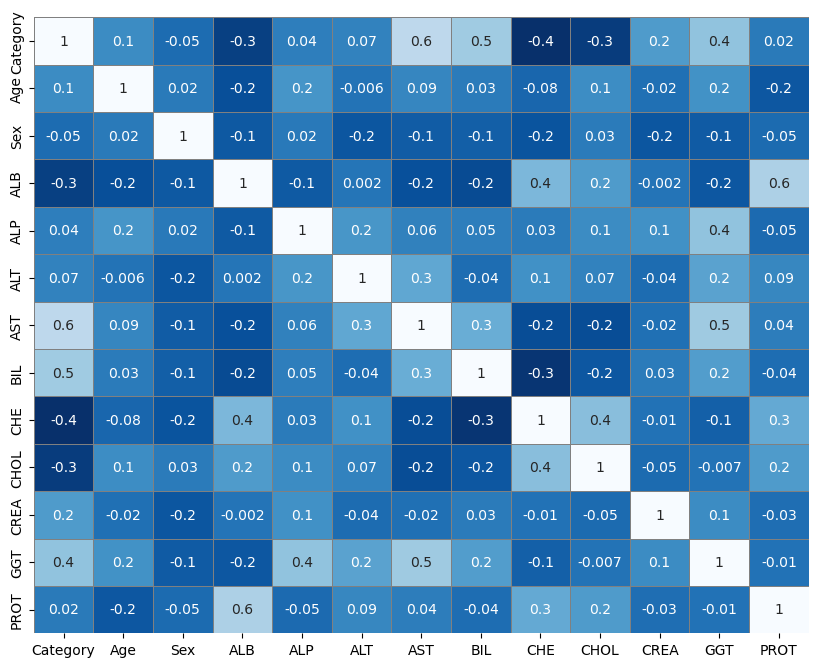

In [13]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [14]:
df['Category'].value_counts()

0    540
3     30
1     24
2     21
Name: Category, dtype: int64

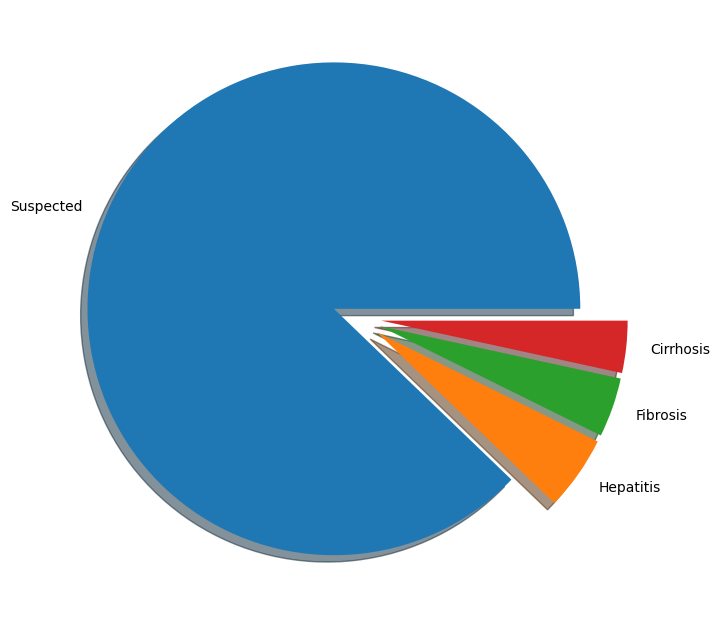

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(), 
        labels=["Suspected","Hepatitis", "Fibrosis", "Cirrhosis"], 
        shadow = True, 
        explode = (0.1, 0.1, 0.1, 0.1)
        )

plt.show()

In [16]:
df.Sex.value_counts()

1    377
2    238
Name: Sex, dtype: int64

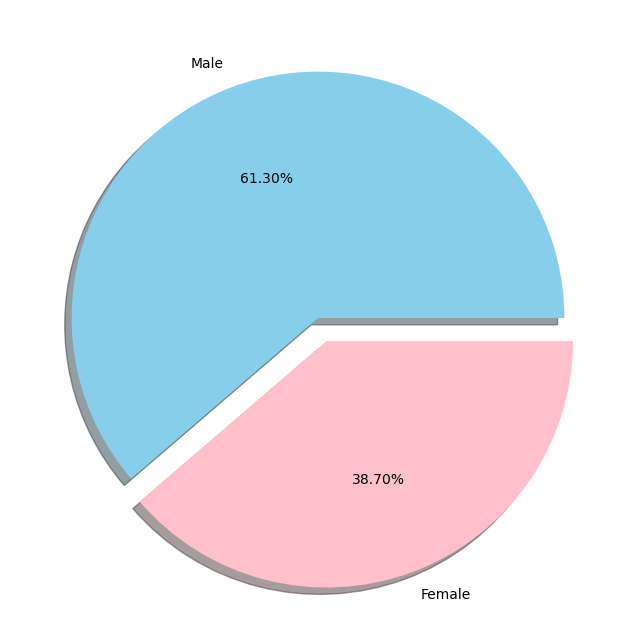

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

Text(0.5, 0, 'GGT')

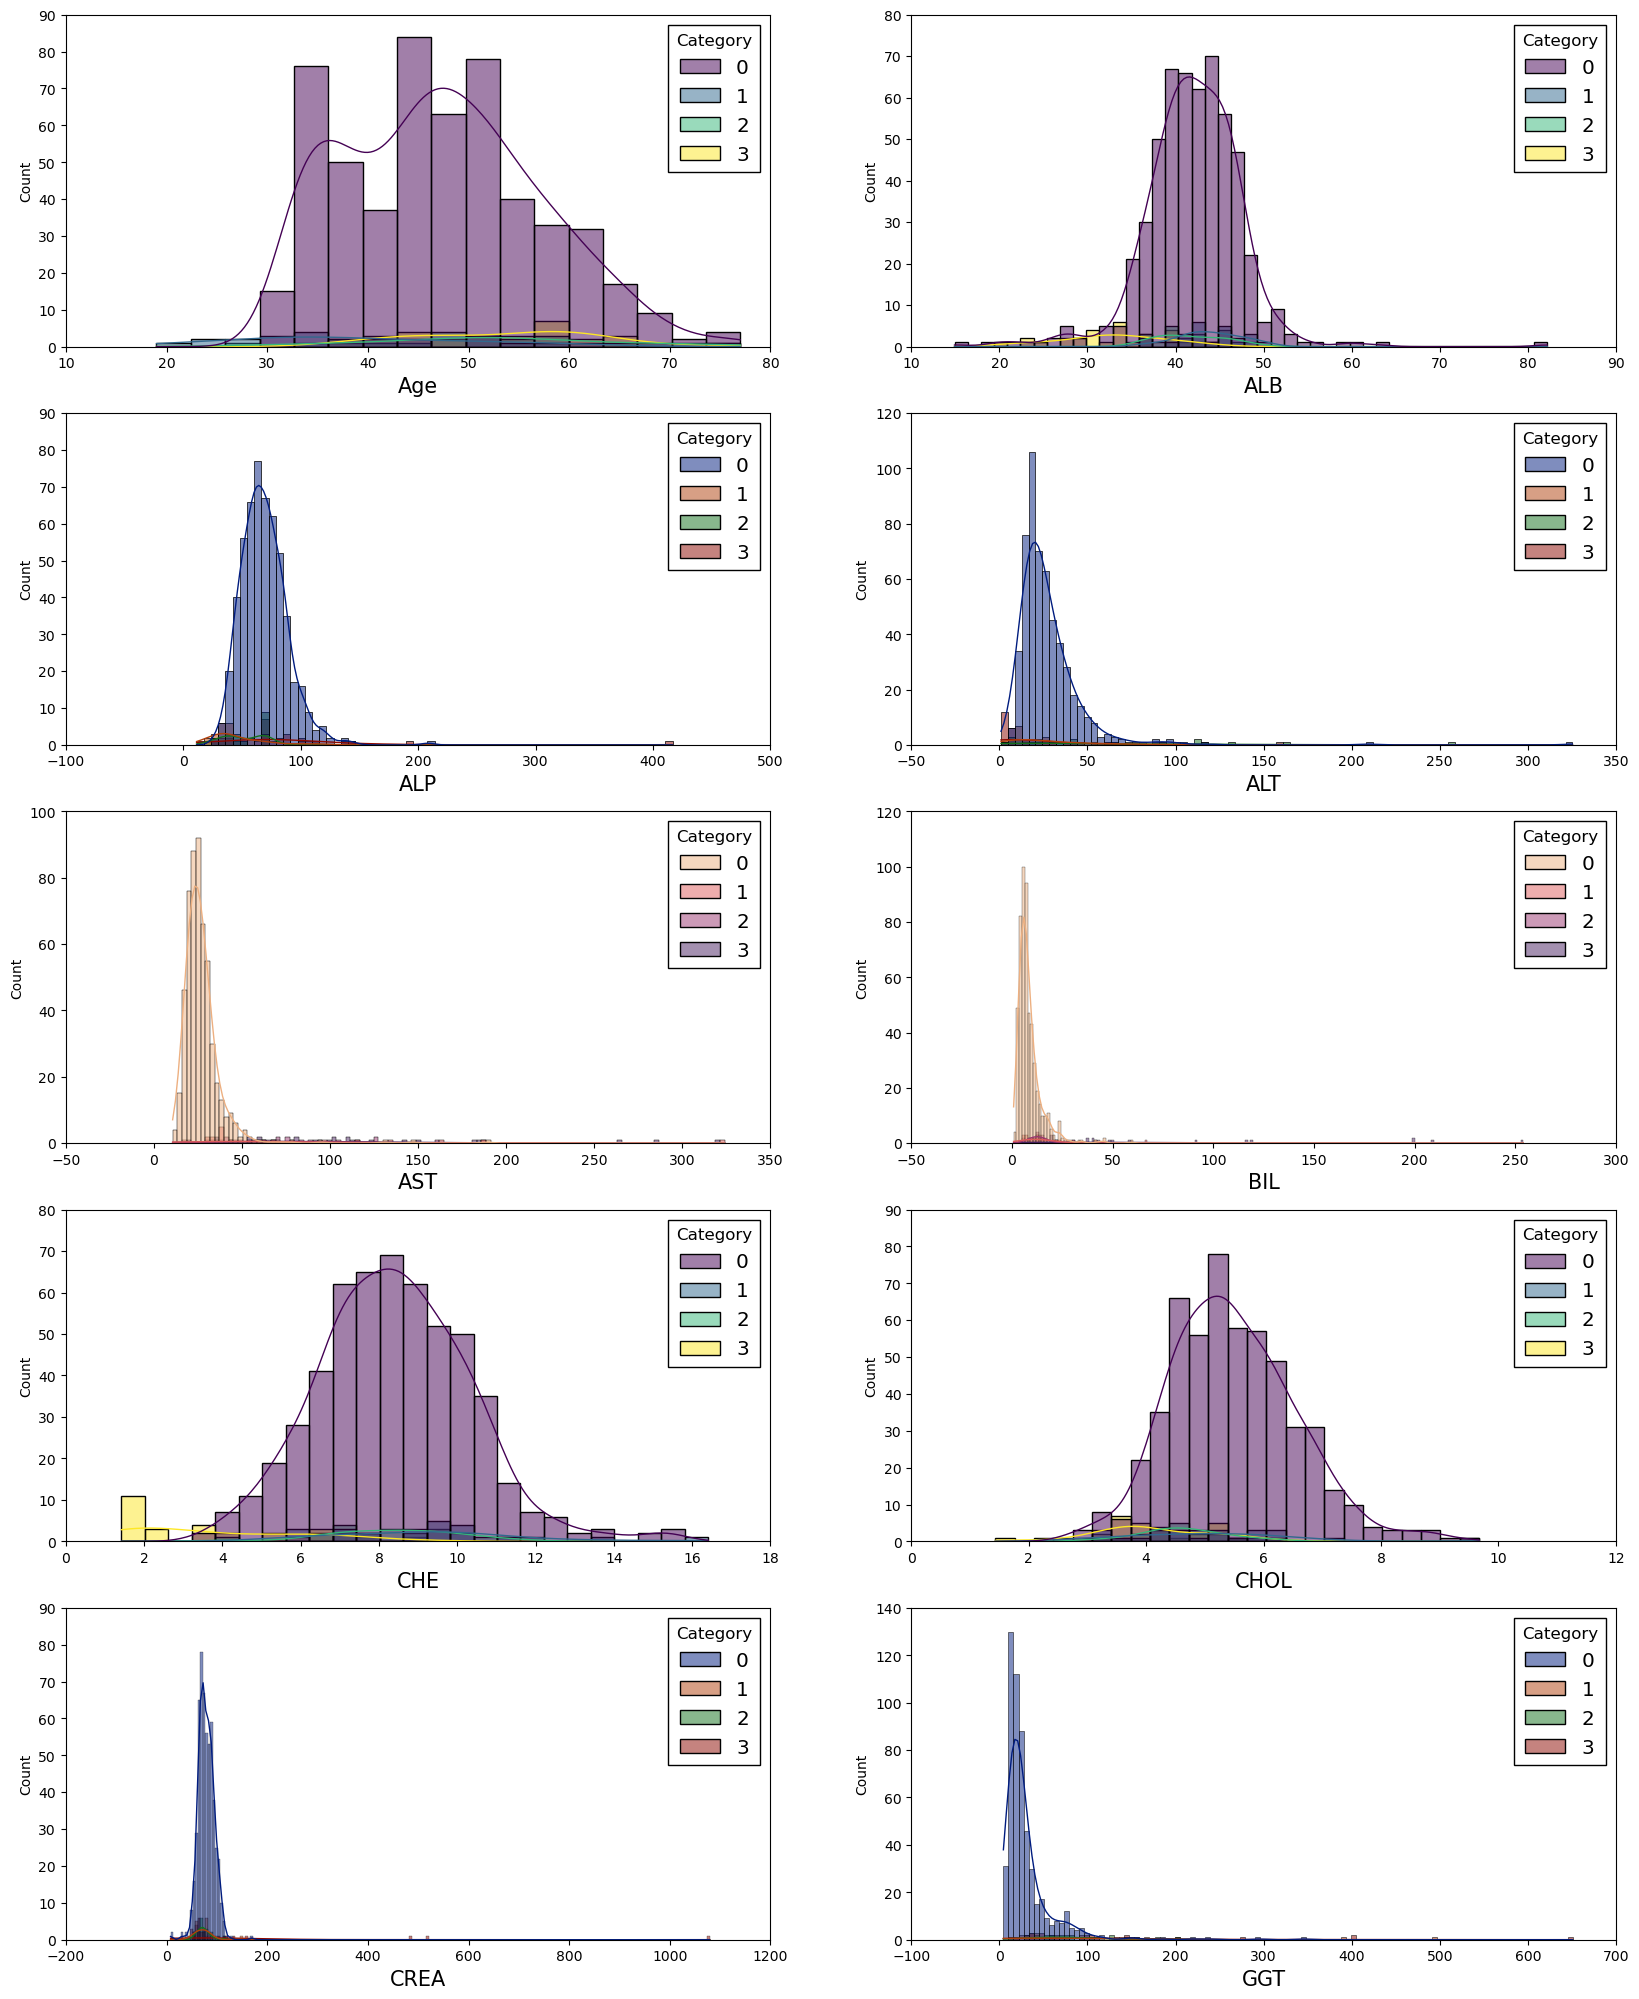

In [18]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

## Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the `Category` will be the y label and rest of the data will be the X or the input data.

In [19]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(492, 12)

In [23]:
X_test.shape

(123, 12)

In [24]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 87.8048780487805


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


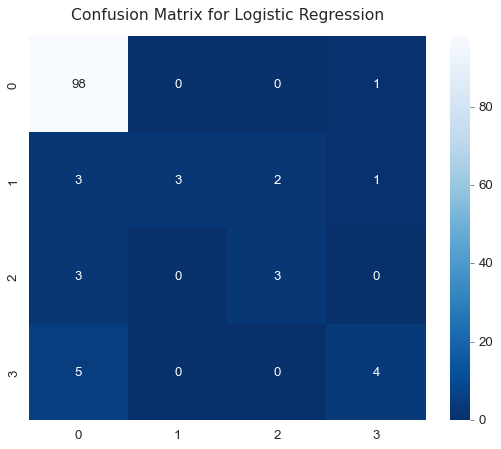

In [27]:
# Take a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [28]:
# Take a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       1.00      0.33      0.50         9
           2       0.60      0.50      0.55         6
           3       0.67      0.44      0.53         9

    accuracy                           0.88       123
   macro avg       0.79      0.57      0.63       123
weighted avg       0.87      0.88      0.86       123



## Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 89.43089430894308


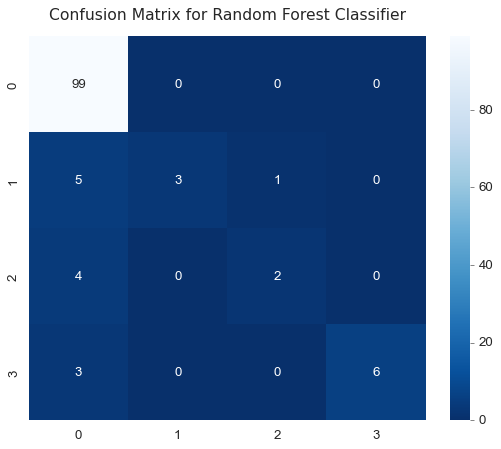

In [31]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [32]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.33      0.50         9
           2       0.67      0.33      0.44         6
           3       1.00      0.67      0.80         9

    accuracy                           0.89       123
   macro avg       0.89      0.58      0.67       123
weighted avg       0.90      0.89      0.88       123



## K Neighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 83.73983739837398


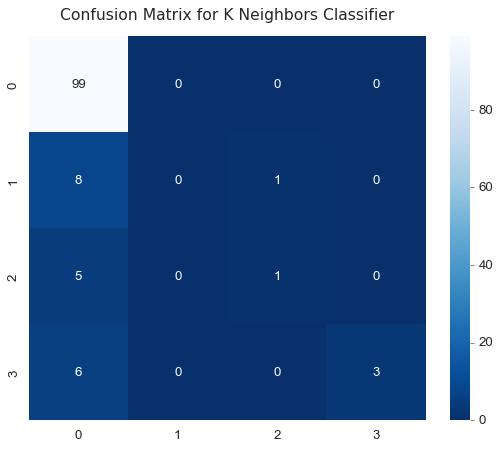

In [35]:
# Confustion Matrix 

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [36]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        99
           1       0.00      0.00      0.00         9
           2       0.50      0.17      0.25         6
           3       1.00      0.33      0.50         9

    accuracy                           0.84       123
   macro avg       0.58      0.38      0.42       123
weighted avg       0.77      0.84      0.78       123



## DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 88.6178861788618


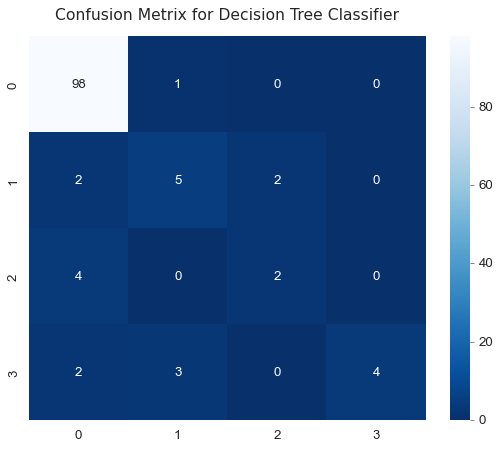

In [39]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [40]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        99
           1       0.56      0.56      0.56         9
           2       0.50      0.33      0.40         6
           3       1.00      0.44      0.62         9

    accuracy                           0.89       123
   macro avg       0.75      0.58      0.63       123
weighted avg       0.88      0.89      0.87       123



## Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 88.6178861788618


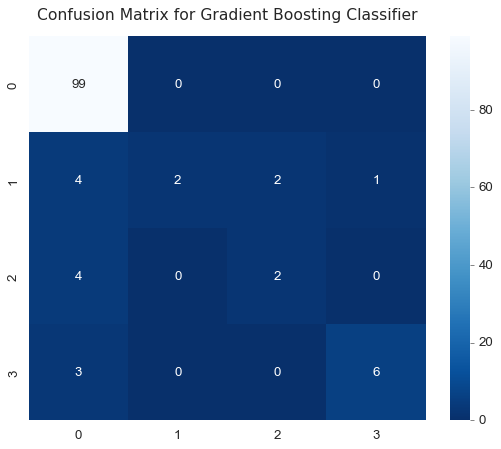

In [43]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [44]:
# Classification Report of Gradient Boosting Classifier

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        99
           1       1.00      0.22      0.36         9
           2       0.50      0.33      0.40         6
           3       0.86      0.67      0.75         9

    accuracy                           0.89       123
   macro avg       0.81      0.56      0.62       123
weighted avg       0.88      0.89      0.86       123



findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


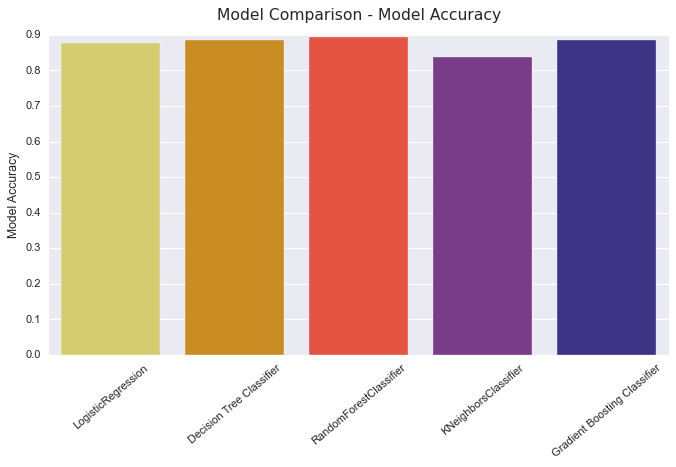

In [45]:
plt.style.use("seaborn")

x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier",
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x,y=y, palette="CMRmap_r");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

* `Gradient Boosting Classifier` and `Random Forest Regression` perform best on the test set.

## Hyperparameter Tuning on Random Forest Classifier

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

In [47]:
grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [48]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [49]:
print("Accuracy obtained by GridSearchCV Random Forest Classifier model:",grid_search_rfc.best_score_*100)

Accuracy obtained by GridSearchCV Random Forest Classifier model: 93.90243902439023


In [50]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

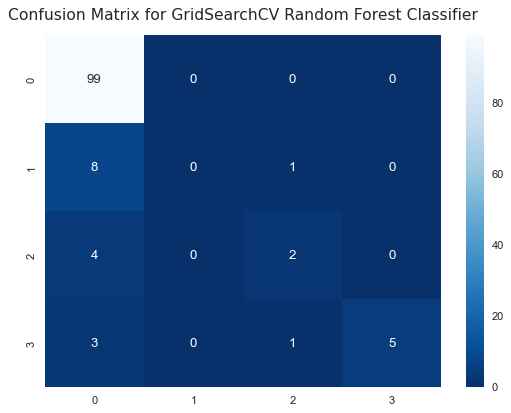

In [51]:
# Confusion matrix

cf_matrix = confusion_matrix(y_test, grid_search_rfc_predict)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for GridSearchCV Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [52]:
# Classification Report of GridSearch-RandomForestRegression

print(classification_report(y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        99
           1       0.00      0.00      0.00         9
           2       0.50      0.33      0.40         6
           3       1.00      0.56      0.71         9

    accuracy                           0.86       123
   macro avg       0.59      0.47      0.51       123
weighted avg       0.80      0.86      0.82       123



In [53]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 5.00%.


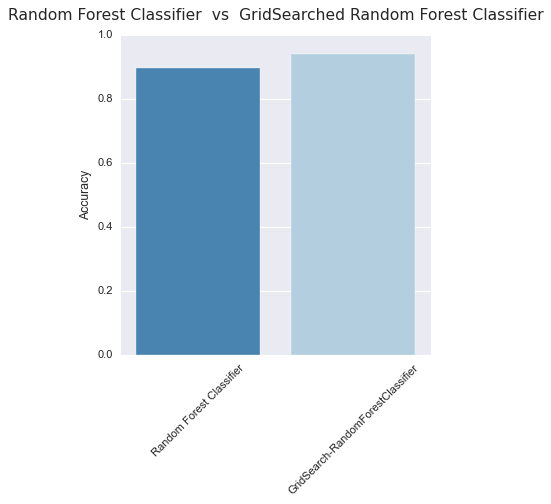

In [54]:
# Comparing the results after the improvement in Random Forest Classifier

plt.style.use("seaborn")

x = ["Random Forest Classifier",  
     "GridSearch-RandomForestClassifier"]

y = [RandomForestClassifierScore,  
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier  vs  GridSearched Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

### After Hyperparameter tuning, the Random Forest Regression model performs better which was not the case before!